<a href="https://colab.research.google.com/github/YasinRezvani/Python_Learning_Practice_Notebooks/blob/master/Exercise%20Notebooks/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load dataset
(x_train,y_train) , (x_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


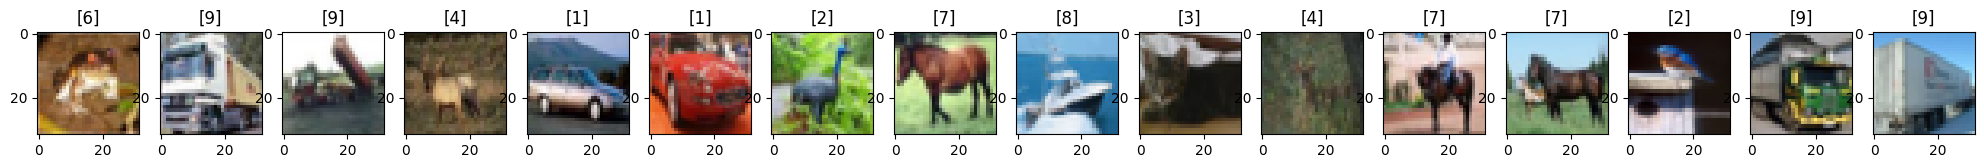

In [3]:
# show dataset  -- class vectors
plt.figure(figsize=(25,4))
for i in range(16):
    plt.subplot(1,16,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [4]:
# convert class vectors to binary class matrices with keras methods
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

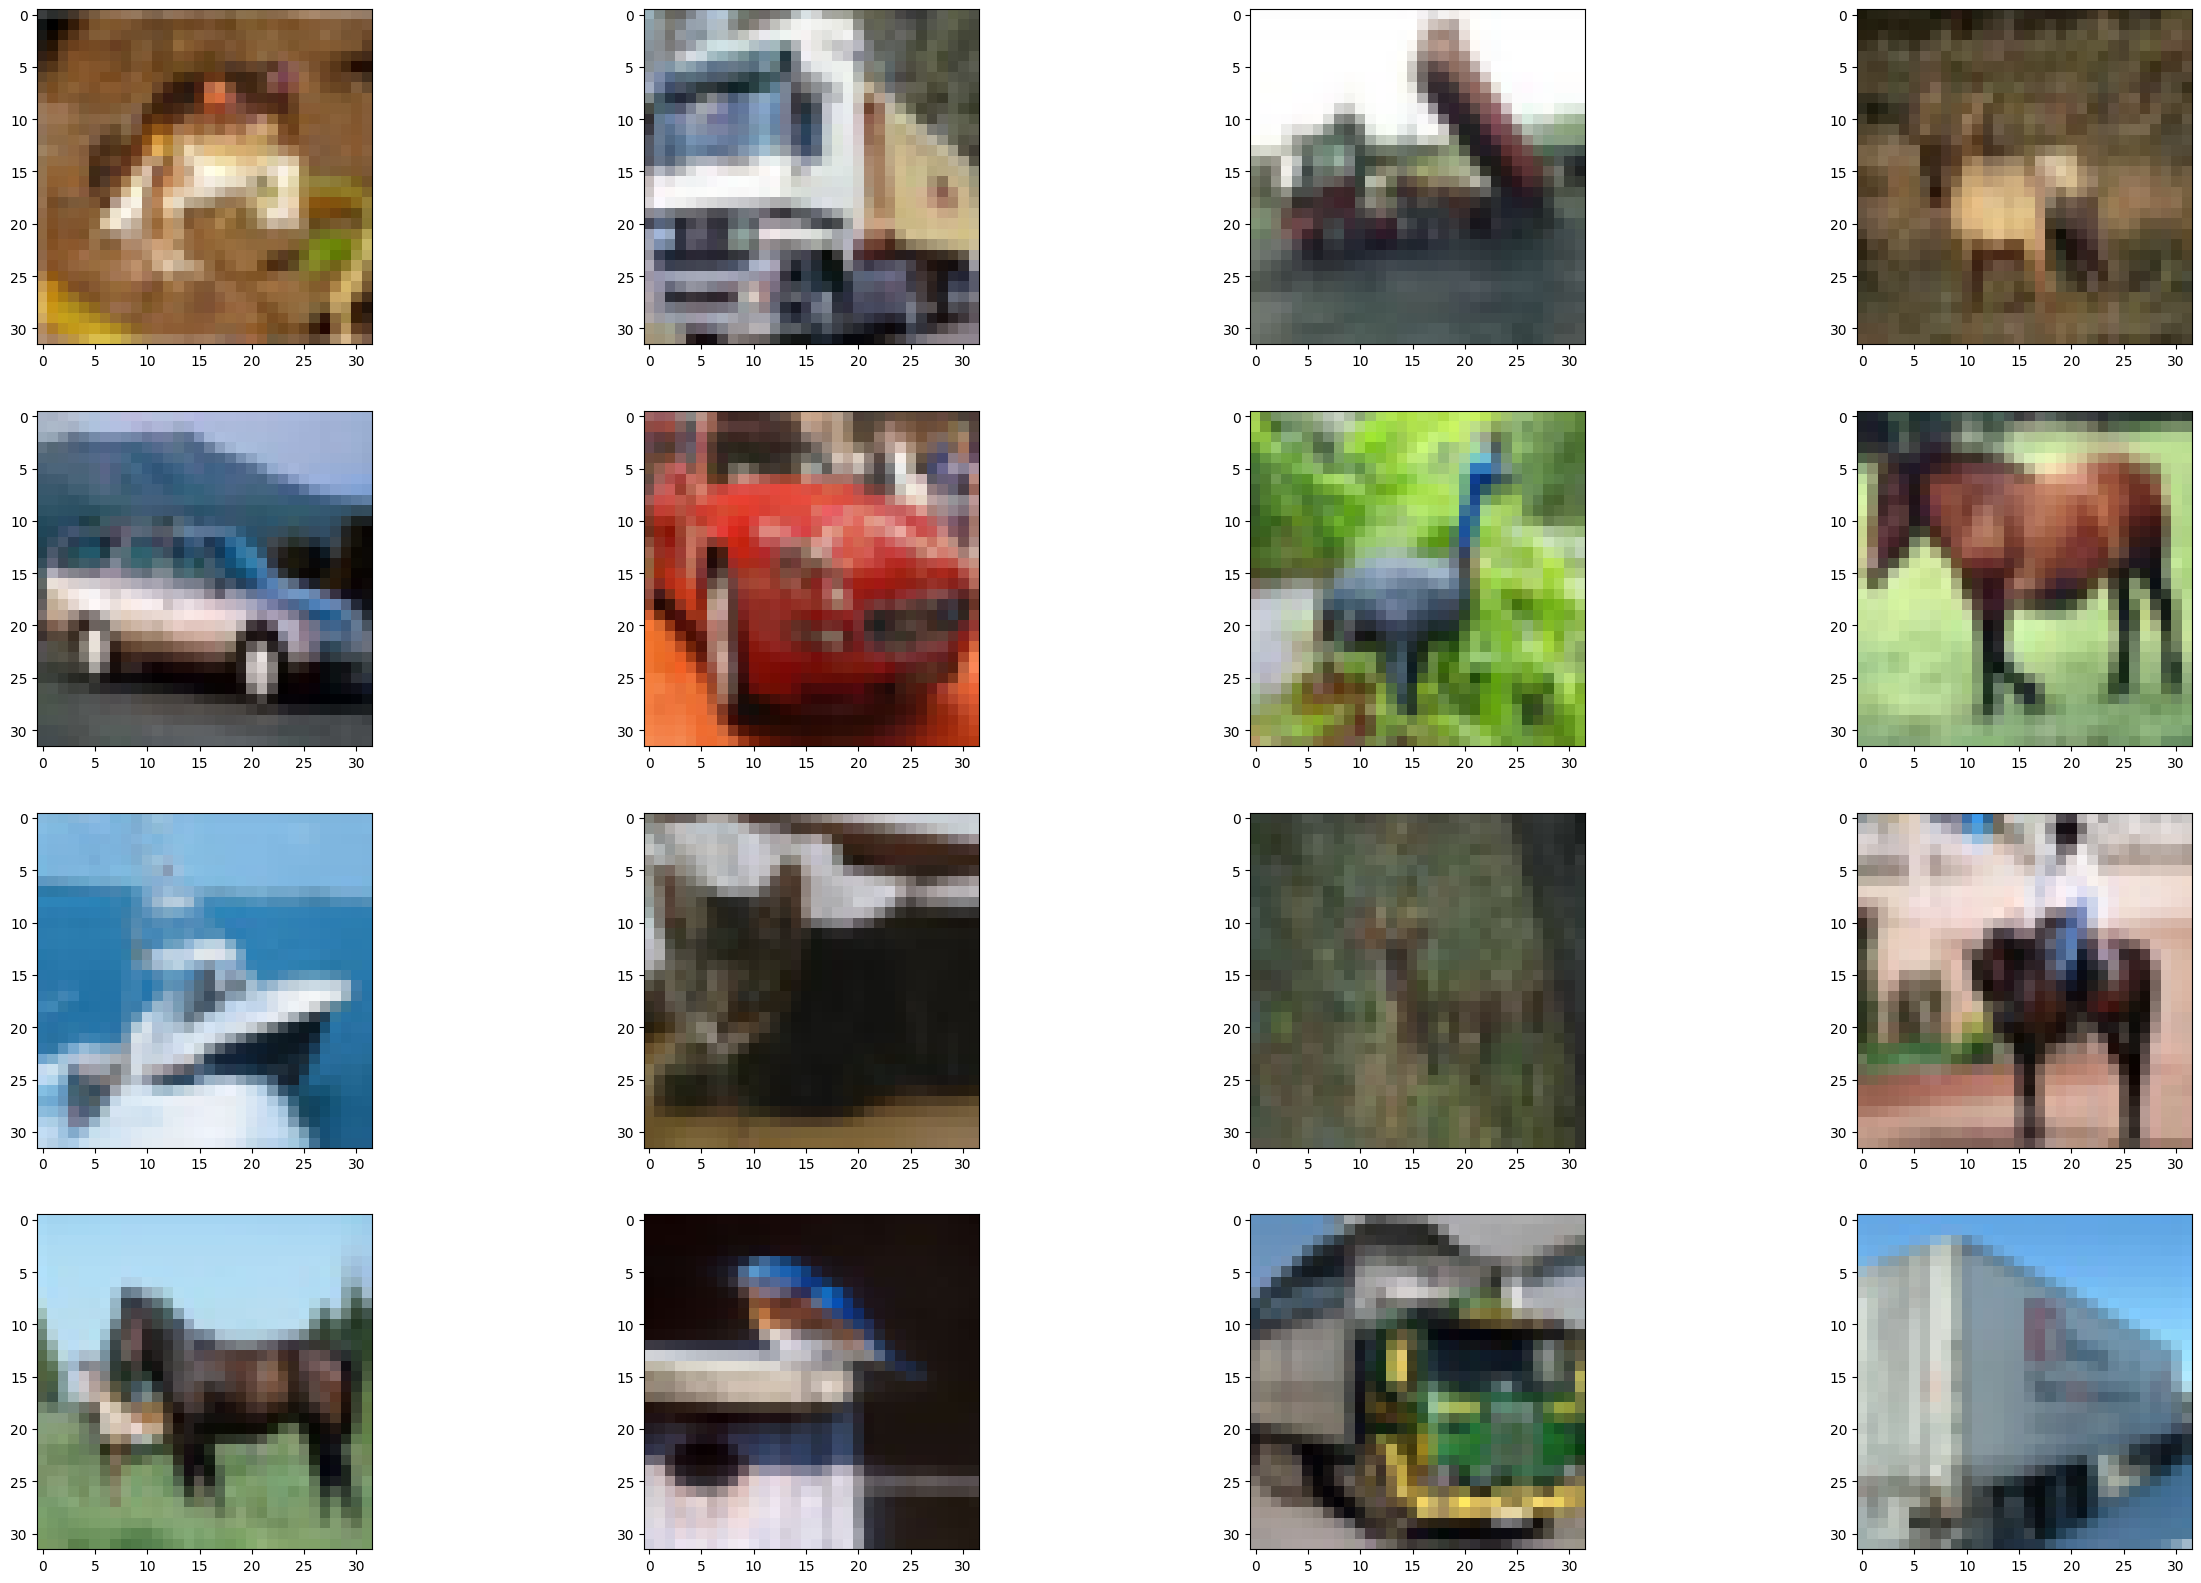

In [6]:
# show dataset - binary class matrices
plt.figure(figsize=(30,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    #plt.title(y_train[i])

In [12]:
# define model
# units in deep layer are count of neurons to found the feature of any image of dataset
# units in last layer are just 10 classes for output of model
def define_model(data_shape,num_layers):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=data_shape))
    model.add(keras.layers.Flatten())
    for i in range(num_layers):
        model.add(keras.layers.Dense(units=512,activation='relu'))
    model.add(keras.layers.Dense(units=num_classes,activation="softmax"))
    return model

In [13]:
# evaluate models
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []
for num_layers in range(0, 21):
    model = define_model(x_train[0].shape, num_layers)

    # compile model
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # train model
    history = model.fit(x_train, y_train,
                        batch_size=200,
                        epochs=20,
                        validation_data=(x_test, y_test),
                        shuffle=True,
                        verbose=0)

    #
    train_loss.append(history.history['loss'][-1])
    valid_loss.append(history.history['val_loss'][-1])
    train_acc.append(history.history['accuracy'][-1])
    valid_acc.append(history.history['val_accuracy'][-1])

    print('layers = {}, params = {}, train_acc = {:4f}, val_acc = {:4f}'.format(num_layers+1, model.count_params(), train_acc[-1], valid_acc[-1]))

layers = 1, params = 30730, train_acc = 0.283380, val_acc = 0.270700
layers = 2, params = 1578506, train_acc = 0.372580, val_acc = 0.340400
layers = 3, params = 1841162, train_acc = 0.452960, val_acc = 0.397300
layers = 4, params = 2103818, train_acc = 0.479780, val_acc = 0.423700
layers = 5, params = 2366474, train_acc = 0.534480, val_acc = 0.438000
layers = 6, params = 2629130, train_acc = 0.586980, val_acc = 0.469700
layers = 7, params = 2891786, train_acc = 0.622780, val_acc = 0.474800
layers = 8, params = 3154442, train_acc = 0.639140, val_acc = 0.492000
layers = 9, params = 3417098, train_acc = 0.659840, val_acc = 0.497400
layers = 10, params = 3679754, train_acc = 0.671360, val_acc = 0.491700
layers = 11, params = 3942410, train_acc = 0.679120, val_acc = 0.498200
layers = 12, params = 4205066, train_acc = 0.696540, val_acc = 0.512800
layers = 13, params = 4467722, train_acc = 0.681360, val_acc = 0.498300
layers = 14, params = 4730378, train_acc = 0.690640, val_acc = 0.490700
lay